In [ ]:
# Installing the environment
!pip install timm
!pip install wandb

In [ ]:
SRCDIR="src/"

import os
import sys
sys.path.append(SRCDIR)

from classify import train_main # type: ignore

dinov2 large model

In [ ]:
dataset_dir = "src/dataset_csv/classification"
image_size=518
batch_size = 128
lr = 0.0002
epochs = 10
weight_decay = 0.001
resume_ckpt = "" # Resume the previous checkpointing
freeze_backbone = True
model_name="vit_large_patch14_dinov2.lvd142m"
exp_name = "freeze"
save_dir = os.path.join("/content/drive/MyDrive/solar_PV_prediction/outputs/12.9_classification_stage1") # replace with your own path
os.makedirs(save_dir, exist_ok=True)
train_main(dataset_dir,
           image_size=image_size,
           batch_size=batch_size,
           lr=lr, weight_decay=weight_decay,
           epochs=epochs,
           model_name=model_name,
           save_dir=save_dir,
           resume_ckpt=resume_ckpt,
           freeze_backbone=freeze_backbone,
           exp_name=exp_name)

Training on device:  cuda


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

The number of trainable parameters:  1025


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 40 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/content/drive/MyDrive/solar_PV_prediction/src/classify.py:158: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed

Resuming training from epoch 9 Load model from /content/drive/MyDrive/solar_PV_prediction/outputs/12.9_classification_stage1/vit_large_patch14_dinov2_lvd142m_24-12-13_freeze/model_8.pth


/content/drive/MyDrive/solar_PV_prediction/src/classify.py:164: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  fp16_scaler = torch.cuda.amp.GradScaler()
Training for one epoch:   0%|          | 0/6957 [00:00<?, ?it/s]/content/drive/MyDrive/solar_PV_prediction/src/classify.py:176: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(dtype=torch.float16):
Training for one epoch: 100%|██████████| 6957/6957 [3:07:36<00:00,  1.62s/it, loss=0.054, lr=1e-6]


Epoch 10/10, Training Loss: 0.0496, Validation Loss: 0.0473
Accuracy: 0.9884, Balanced Accuracy: 0.8854, AUROC: 0.9785, AUPRC: 0.8799, Precision: 0.9160, Recall: 0.7736


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 40 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/content/drive/MyDrive/solar_PV_prediction/src/classify.py:227: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(dtype=torch.float16):
100%|██████████| 16/16 [00:55<00:00,  3.46s/it]


Accuracy: 0.7755, Balanced Accuracy: 0.8229 AUROC: 0.9221, AUPRC: 0.6866, Precision: 0.3188, Recall: 0.8839


Inception Net

In [ ]:
dataset_dir = "src/dataset_csv/classification"
image_size=518
batch_size = 128
lr = 0.0002
epochs = 10
weight_decay = 0.001
resume_ckpt = "" # Resume the previous checkpointing
freeze_backbone = True
model_name="timm/inception_v3.tf_adv_in1k"
exp_name = "freeze"
save_dir = os.path.join("/content/drive/MyDrive/solar_PV_prediction/outputs/12.9_classification_stage1") # replace with your own path
os.makedirs(save_dir, exist_ok=True)
train_main(dataset_dir,
           image_size=image_size,
           batch_size=batch_size,
           lr=lr, weight_decay=weight_decay,
           epochs=epochs,
           model_name=model_name,
           save_dir=save_dir,
           resume_ckpt=resume_ckpt,
           freeze_backbone=freeze_backbone,
           exp_name=exp_name)

Run evaluation on test

<ipython-input-7-208d7a4316fb>:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  classifier_state = torch.load(classifier_path)
/usr/local/lib/python3.10/dist-packages/torch

[]


  0%|          | 0/125 [00:00<?, ?it/s]/content/drive/MyDrive/solar_PV_prediction/src/classify.py:235: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(dtype=torch.float16):
100%|██████████| 125/125 [00:21<00:00,  5.72it/s]


Accuracy: 0.7605, Balanced Accuracy: 0.8281 AUROC: 0.9246, AUPRC: 0.6923, Precision: 0.3083, Recall: 0.9152
Setting image size to  518


<ipython-input-7-208d7a4316fb>:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  classifier_state = torch.load(classifier_path)
/usr/local/lib/python3.10/dist-packages/torch

[]


  0%|          | 0/125 [00:00<?, ?it/s]/content/drive/MyDrive/solar_PV_prediction/src/classify.py:235: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(dtype=torch.float16):
100%|██████████| 125/125 [00:11<00:00, 10.86it/s]


Accuracy: 0.1830, Balanced Accuracy: 0.5302 AUROC: 0.6106, AUPRC: 0.1811, Precision: 0.1185, Recall: 0.9777


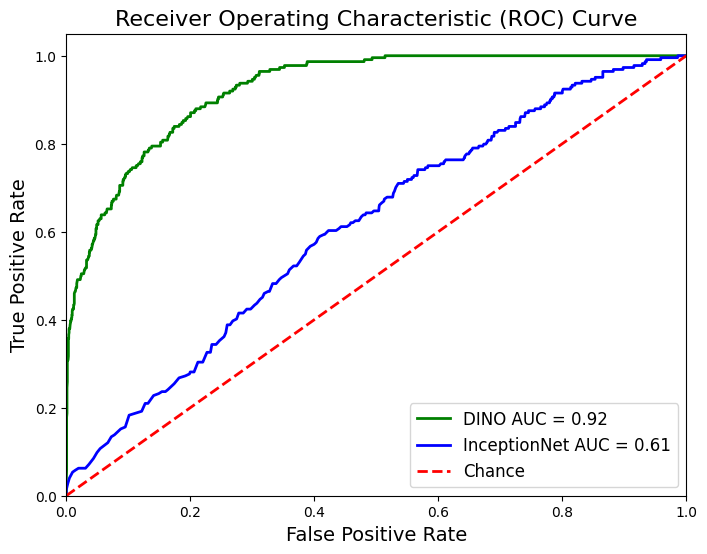

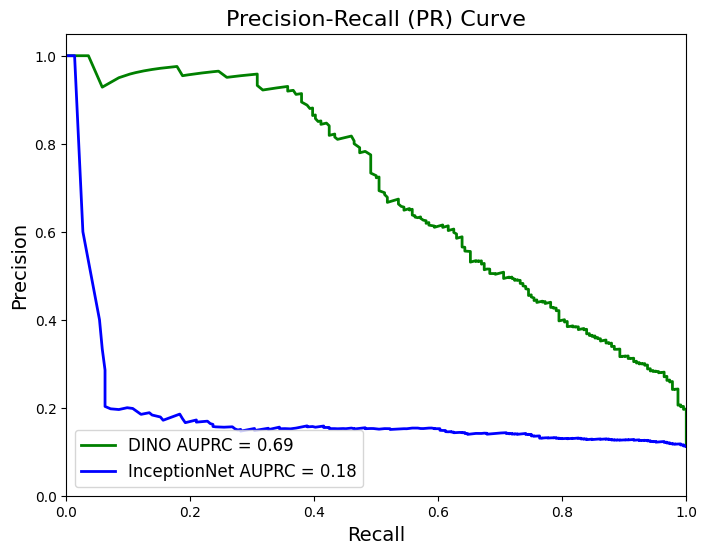

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import timm
import wandb
import pandas as pd
from tqdm import tqdm
from PIL import Image
from torch.utils.data import DataLoader
from torchvision import transforms

SRCDIR="src/"

import os
import sys
sys.path.append(SRCDIR)

from classify import make_models_transforms, ImageDataset, evaluate_model # type: ignore

writer = wandb.init(project="Solar-PV-classification-finetuning-test")

test_csv = "src/dataset_csv/classification/test.csv"

classifier_names = {"DINO": "vit_large_patch14_dinov2.lvd142m", "InceptionNet": "timm/inception_v3.tf_adv_in1k"}
classifier_paths = {
    "DINO": "/content/drive/MyDrive/solar_PV_prediction/outputs/12.9_classification_stage1/vit_large_patch14_dinov2_lvd142m_24-12-21_freeze/model_9.pth", # replace with your own model path
    "InceptionNet": "/content/drive/MyDrive/solar_PV_prediction/outputs/12.9_classification_stage1/timm_inception_v3_tf_adv_in1k_24-12-19_freeze/model_9.pth" # replace with your own model path
}
colors = {
    "DINO": "green",
    "ResNet": "blue",
    "InceptionNet": "blue"
}

save_dir = "/content/drive/MyDrive/solar_PV_prediction/outputs/test_evaluation" # replace with your own path
os.makedirs(save_dir, exist_ok=True)
image_size=518

results = {}

for model in ["DINO", "InceptionNet"]:
  classifier_name = classifier_names[model]
  classifier_path = classifier_paths[model]

  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  classifier, TRAIN_TRANSFORM, VAL_TRANSFORM = make_models_transforms(classifier_name, image_size)
  classifier = classifier.to(device)
  classifier_state = torch.load(classifier_path)
  msg, _ = classifier.load_state_dict(classifier_state)
  print(msg)
  classifier.eval()

  # load test dataset
  test_dataset = ImageDataset(csv_file=test_csv, transform=VAL_TRANSFORM)
  test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=40)
  labels, _, probs = evaluate_model(classifier, test_loader)
  results[model] = {
      "labels": labels,
      "probs": probs
  }


# plot the ROC and AUPRC curves
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Function to plot ROC curve
def plot_roc_curve(results, colors, save_path):
    plt.figure(figsize=(8, 6))
    for model in ["DINO", "InceptionNet"]:
        labels = results[model]["labels"]
        probs = results[model]["probs"]
        fpr, tpr, _ = roc_curve(labels, probs)
        roc_auc = auc(fpr, tpr)
        # Plot the ROC curve
        plt.plot(fpr, tpr, color=colors[model], lw=2, label=f'{model} AUC = {roc_auc:.2f}')

    # Add a dashed diagonal line for chance
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Chance')

    # Customize axes and titles
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)

    # Remove background grid
    plt.grid(False)
    plt.savefig(save_path)
    plt.show()

# Function to plot AUPRC curve
def plot_auprc_curve(results, colors, save_path):
    plt.figure(figsize=(8, 6))
    for model in ["DINO", "InceptionNet"]:
        labels = results[model]["labels"]
        probs = results[model]["probs"]
        precision, recall, _ = precision_recall_curve(labels, probs)
        auprc = average_precision_score(labels, probs)
        # Plot the Precision-Recall curve
        plt.plot(recall, precision, color=colors[model], lw=2, label=f'{model} AUPRC = {auprc:.2f}')

    # Customize axes and titles
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title('Precision-Recall (PR) Curve', fontsize=16)
    plt.legend(loc="lower left", fontsize=12)

    # Remove background grid
    plt.grid(False)
    plt.savefig(save_path)
    plt.show()

# Plot and save the curves
plot_roc_curve(results, colors, os.path.join(save_dir, "roc_curve.png"))
plot_auprc_curve(results, colors, os.path.join(save_dir, "pr_curve.png"))